Notebook where we calculate and save the results in the coursework, implementing the functions defined in functionsN.py

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#importing the relevant functions from functionsN.py
from functionsN import train_test_index_split
from functionsN import train_test_basic
from functionsN import find_best_val
from functionsN import train_test_basic_ovo
from functionsN import find_best_val_ovo

In [7]:
import numpy as np

# # Instantiating and saving the kernel matrices to be used later

# # Create dot product kernel matrix:

# poly_mat = np.einsum('ij,kj->ik', data[:,1:], data[:,1:])

# np.save('data/poly_mat.npy', poly_mat)

# # Create Gaussian kernel matrix:

# from scipy.spatial.distance import pdist, squareform

# sq_dists = squareform(pdist(data[:,1:], 'sqeuclidean'))

# gauss_mat = np.exp(-sq_dists)

# np.save('data/gauss_mat.npy', gauss_mat)

In [9]:
#import data

data = np.loadtxt(('zipcombo.dat'))
poly_mat = np.load('data/poly_mat.npy')
gauss_mat = np.load('data/gauss_mat.npy')

data_idx = np.arange(len(data))

1. Basic results for the polynomial kernel

In [3]:
#results stored: dim1=d, dim2=run, dim3=train/test
results = np.zeros((7,20,2))

for d in range(7):
    for i in range(20):
        train_idx, test_idx = train_test_index_split(data_idx)
        r_train, r_test = train_test_basic(train_idx, test_idx, poly_mat, d+1)           #use 3 epochs (convergence here)
        print(f'Calculating run {i+1} for power {d+1}.')
        results[d,i,0], results[d,i,1] = r_train['error_rate'], r_test['error_rate'] 

np.save('resultsN/basic_poly_results.npy', results)

Calculating run 1 for power 1.
Calculating run 2 for power 1.
Calculating run 3 for power 1.
Calculating run 4 for power 1.
Calculating run 5 for power 1.
Calculating run 6 for power 1.
Calculating run 7 for power 1.
Calculating run 8 for power 1.
Calculating run 9 for power 1.
Calculating run 10 for power 1.
Calculating run 11 for power 1.
Calculating run 12 for power 1.
Calculating run 13 for power 1.
Calculating run 14 for power 1.
Calculating run 15 for power 1.
Calculating run 16 for power 1.
Calculating run 17 for power 1.
Calculating run 18 for power 1.
Calculating run 19 for power 1.
Calculating run 20 for power 1.
Calculating run 1 for power 2.
Calculating run 2 for power 2.
Calculating run 3 for power 2.
Calculating run 4 for power 2.
Calculating run 5 for power 2.
Calculating run 6 for power 2.
Calculating run 7 for power 2.
Calculating run 8 for power 2.
Calculating run 9 for power 2.
Calculating run 10 for power 2.
Calculating run 11 for power 2.
Calculating run 12 for pow

In [16]:
basic_poly_results_loaded = np.load('resultsN/basic_poly_results.npy')
means = np.mean(basic_poly_results_loaded, axis = 1)
stds = np.std(basic_poly_results_loaded, axis=1)

2. Cross-validation, 3. Confusion matrix

In [4]:
candidates = [1,2,3,4,5,6,7]

d_star_list = np.zeros(20)
test_error_list = np.zeros(20)
conf_mat_list = np.zeros((20,10,10))
incorrect_pred_idx = np.zeros(len(data))

CV_mistakes_idx = data_idx.copy()
        
for i in range(20):
    print(f'Run {i+1}')
    d_star, r_train, r_test = find_best_val(data_idx, poly_mat, candidates)
    d_star_list[i] = d_star
    test_error_list[i] = r_test['error_rate']
    conf_mat_list[i,:,:] = r_test['conf_mat']
    incorrect_pred_idx += r_test['mistakes_idx']

np.save('resultsN/poly_best_vals.npy', d_star_list)
np.save('resultsN/poly_cv_errors.npy', test_error_list)
np.save('resultsN/poly_conf_mats.npy', conf_mat_list)
np.save('resultsN/poly_wrong_preds.npy', incorrect_pred_idx)

Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
Run 20


In [14]:
d_star_list_loaded = np.load('resultsN/poly_best_vals.npy')
test_error_list_loaded = np.load('resultsN/poly_cv_errors.npy')
conf_mat_list_loaded = np.load('resultsN/poly_conf_mats.npy')

test_error_mean = np.mean(test_error_list_loaded)
test_error_std = np.std(test_error_list_loaded)

conf_mat_mean = np.mean(conf_mat_list_loaded, axis=0)
conf_mat_std = np.std(conf_mat_list_loaded, axis=0)

4. Hardest to predict images

In [3]:
# test every image 90 times (enforced using the cross-validation split) and count the number of mistakes
# use the powers 5,6,7 because they came up frequently in the previous exercise

def count_mistakes(n):
    
    incorrect_pred_idx = np.zeros(len(data))

    for i in range(n):
        print(f'round {i+1}')
        for dd in range(5,8):
            print(f'd: {dd}')
            #use cross-validating split to ensure every data point gets tested the same # of times
            train_idx, test_idx = train_test_index_split(data_idx, CV=True)
            for k in range(5):
                _, r_test = train_test_basic(train_idx[k], test_idx[k], poly_mat, dd, keep_mistakes=True)
                incorrect_pred_idx += r_test['mistakes_idx']
            
    num_tests = n*3
    return incorrect_pred_idx, num_tests

wrong_preds = count_mistakes(30)

np.save('resultsN/wrong_pics_more.npy', wrong_preds[0])


round 1
d: 5
d: 6
d: 7
round 2
d: 5
d: 6
d: 7
round 3
d: 5
d: 6
d: 7
round 4
d: 5
d: 6
d: 7
round 5
d: 5
d: 6
d: 7
round 6
d: 5
d: 6
d: 7
round 7
d: 5
d: 6
d: 7
round 8
d: 5
d: 6
d: 7
round 9
d: 5
d: 6
d: 7
round 10
d: 5
d: 6
d: 7
round 11
d: 5
d: 6
d: 7
round 12
d: 5
d: 6
d: 7
round 13
d: 5
d: 6
d: 7
round 14
d: 5
d: 6
d: 7
round 15
d: 5
d: 6
d: 7
round 16
d: 5
d: 6
d: 7
round 17
d: 5
d: 6
d: 7
round 18
d: 5
d: 6
d: 7
round 19
d: 5
d: 6
d: 7
round 20
d: 5
d: 6
d: 7
round 21
d: 5
d: 6
d: 7
round 22
d: 5
d: 6
d: 7
round 23
d: 5
d: 6
d: 7
round 24
d: 5
d: 6
d: 7
round 25
d: 5
d: 6
d: 7
round 26
d: 5
d: 6
d: 7
round 27
d: 5
d: 6
d: 7
round 28
d: 5
d: 6
d: 7
round 29
d: 5
d: 6
d: 7
round 30
d: 5
d: 6
d: 7


[8047  257  128   83   61   38   43   34   30   28   28   28   15   17
   14   11   14   15    5   13   12    7    8    9    8    9    9    5
   12    5    4    6    7    6    6    6    3    5    6    7    7    6
    2    1    7    6    6    3    7    4    4    4    5    2    4    5
    7    3    3    8    6    4    3    1    2    3    3    0    4    5
    4    2    5    6    2    2    2    3    4    1    2    5    4    7
    7    4    5    6    9   14   30]


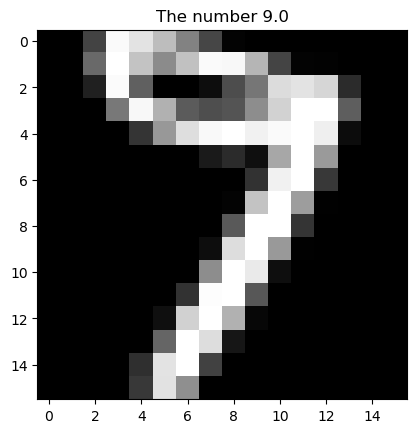

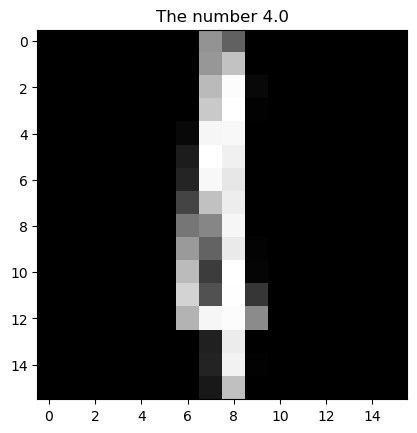

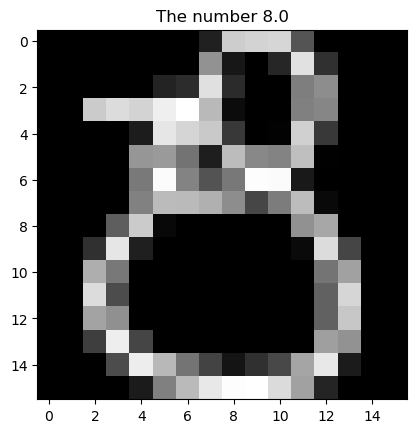

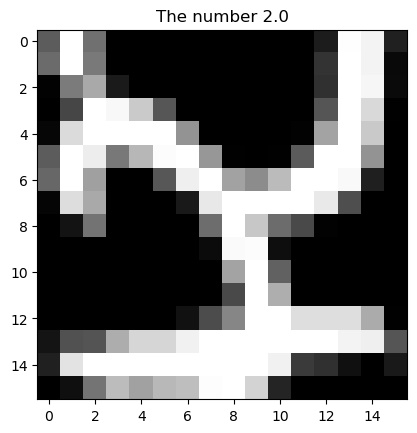

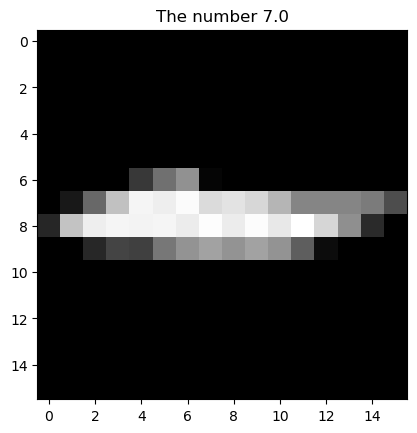

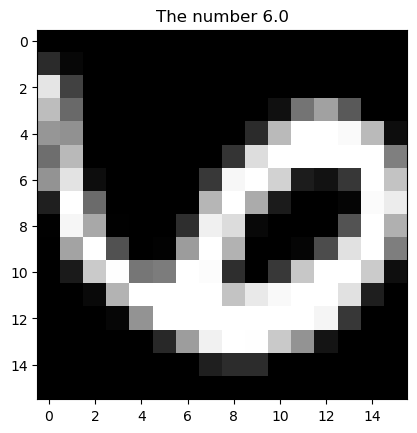

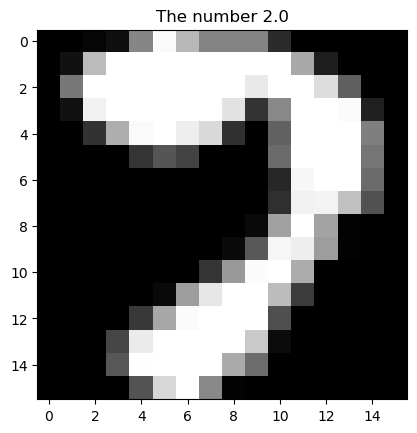

In [4]:
# show some of the wrongly predicted images

wrong_pred_counts_loaded = np.load('resultsN/wrong_pics_more.npy')

print(np.bincount(wrong_pred_counts_loaded.astype(int)))

hardest_to_predict = np.argsort(-wrong_pred_counts_loaded)

#define a plotting function
def plot_char(char):
    label = char[0]
    pixels = np.array(char[1:257]).reshape(16, 16)
    
    plt.imshow(pixels, cmap='gray')
    plt.title(f"The number {label}")
    plt.show()

for i in hardest_to_predict[:7]:
    plot_char(data[i,:])

5. Gaussian Kernel

In [ ]:
#checking a wide variety of candidates of c for the Gaussian kernel 

initial_candidates = [-2,-1,-0.5,-0.1,0.001,0.005,0.01,0.025,0.50,0.075,0.1,0.15,0.2,0.3,0.5,1,2]

errors = {c: None for c in initial_candidates}

for c in initial_candidates:
    train_idx, test_idx = train_test_index_split(data_idx)
    r_train, r_test = train_test_basic(train_idx, test_idx, gauss_mat, c)
    errors[c] = r_test['error_rate']

np.save('resultsN/gauss_init_errors.npy', errors)

Questions 1 and 2 with the Gaussian kernel   

In [1]:
#Question 1:
results = np.zeros((7,20,2))
candidates = [0.005, 0.010, 0.015, 0.020, 0.025, 0.030, 0.035]

for j,c in enumerate(candidates):
    for i in range(20):
        print(f'Calculating run {i+1} for candidate {j+1}.')
        train_idx, test_idx = train_test_index_split(data_idx)
        r_train, r_test = train_test_basic(train_idx, test_idx, gauss_mat, c)
        results[j,i,0], results[j,i,1] = r_train['error_rate'], r_test['error_rate'] 

# np.save('resultsN/basic_gauss_results.npy', results)

In [ ]:
basic_gauss_results_loaded = np.load('resultsN/basic_gauss_results.npy')

means = np.mean(basic_gauss_results_loaded, axis = 1)
stds = np.std(basic_gauss_results_loaded, axis=1)

In [ ]:
#Question 2:

candidates = [0.005, 0.010, 0.015, 0.020, 0.025, 0.030, 0.035]

c_star_list = np.zeros(20)
test_error_list = np.zeros(20)
        
for i in range(20):
    print(f'Run {i+1}')
    c_star, r_train, r_test = find_best_val(data_idx, poly_mat, candidates, calc_conf=False, keep_mistakes=False)
    c_star_list[i] = c_star
    test_error_list[i] = r_test['error_rate']

# np.save('resultsN/gauss_best_vals.npy', c_star_list)
# np.save('resultsN/gauss_cv_errors.npy', test_error_list)

In [ ]:
gauss_best_vals_load = np.load('resultsN/gauss_best_vals.npy')
gauss_cv_errors_loaded = np.load('resultsN/gauss_cv_errors.npy')

gauss_best_vals_load.std()
gauss_cv_errors_loaded.std()

6. OVO method

Here, we use the polynomial kernel, as it formed the largest part of 

In [4]:
#1 - basic results

#results stored: dim1=d, dim2=run, dim3=train/test
results = np.zeros((7,20,2))

for d in range(7):
    for i in range(20):
        train_idx, test_idx = train_test_index_split(data_idx)
        r_train, r_test = train_test_basic_ovo(train_idx, test_idx, poly_mat, d+1)
        print(f'Calculating run {i+1} for power {d+1}.')
        results[d,i,0], results[d,i,1] = r_train['error_rate'], r_test['error_rate'] 

np.save('resultsN/basic_ovo_results.npy', results)

Calculating run 1 for power 1.
Calculating run 2 for power 1.
Calculating run 3 for power 1.
Calculating run 4 for power 1.
Calculating run 5 for power 1.
Calculating run 6 for power 1.
Calculating run 7 for power 1.
Calculating run 8 for power 1.
Calculating run 9 for power 1.
Calculating run 10 for power 1.
Calculating run 11 for power 1.
Calculating run 12 for power 1.
Calculating run 13 for power 1.
Calculating run 14 for power 1.
Calculating run 15 for power 1.
Calculating run 16 for power 1.
Calculating run 17 for power 1.
Calculating run 18 for power 1.
Calculating run 19 for power 1.
Calculating run 20 for power 1.
Calculating run 1 for power 2.
Calculating run 2 for power 2.
Calculating run 3 for power 2.
Calculating run 4 for power 2.
Calculating run 5 for power 2.
Calculating run 6 for power 2.
Calculating run 7 for power 2.
Calculating run 8 for power 2.
Calculating run 9 for power 2.
Calculating run 10 for power 2.
Calculating run 11 for power 2.
Calculating run 12 for pow

In [10]:
basic_ovo_results_loaded = np.load('resultsN/basic_ovo_results.npy')

means = np.mean(basic_ovo_results_loaded, axis = 1)
stds = np.std(basic_ovo_results_loaded, axis=1)

In [4]:
#2 - cross-validation

candidates = np.arange(1,8)

d_star_list = np.zeros(20)
test_error_list = np.zeros(20)
        
for i in range(20):
    print(f'Run {i+1}')
    d_star, r_train, r_test = find_best_val_ovo(data_idx, poly_mat, candidates, keep_mistakes=False)
    d_star_list[i] = d_star
    test_error_list[i] = r_test['error_rate']

np.save('resultsN/ovo_cv_errors.npy', test_error_list)
np.save('resultsN/ovo_best_vals.npy', d_star_list)


In [6]:
ovo_cv_errors_loaded = np.load('resultsN/ovo_cv_errors.npy')
ovo_best_vals_loaded = np.load('resultsN/ovo_best_vals.npy')